# Reducing High-Fatality Traffic Accidents in the UK

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of serious accidents. The safety team classes serious accidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these serious accidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

In [16]:
import pandas as pd
accidents = pd.read_csv(r'./data/accident-data.csv')
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1


In [17]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup

,table,field name,code/format,label,note
0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,accident_year,NaN,NaN,NaN
2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,longitude,NaN,NaN,Null if not known
4,Accident,Latitude,NaN,NaN,Null if not known
5,Accident,accident_severity,1,Fatal,NaN
6,Accident,accident_severity,2,Serious,NaN
7,Accident,accident_severity,3,Slight,NaN
8,Accident,number_of_vehicles,NaN,NaN,NaN
9,Accident,number_of_casualties,NaN,NaN,NaN


# The research quesions of the study are as folllows:

1. What time of day and day of the week do most serious accidents happen?
2. Are there any patterns in the time of day/ day of the week when serious accidents occur?
3. What characteristics stand out in serious accidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce serious accidents?

In [18]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

In [19]:
accidents.shape

(91199, 27)

#### 91119 fatal traffic accidents took place in England. The variable 'accident_severity' in the existing data does not seem to be consistent therefore I will create a new feature based on the casualty threshold to indicate the high-fatality accidents namely 'hf_acc'. Accordingly, I will label the accidents with 3 or more fatalies as high fatality accidents.

In [20]:
accidents['hf_acc'] = accidents['number_of_casualties'].apply(lambda x: '1' if x >= 3 else '0')
accidents['hf_acc'].sample(10)

36615    0
86404    0
53222    0
57028    0
73122    1
85899    0
12125    0
35966    0
69538    0
11036    0
Name: hf_acc, dtype: object

In [21]:
accidents['hf_acc'] = accidents['hf_acc'].astype('int')
accidents.describe()

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,hf_acc
count,91199.0,91185.000000,91185.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000
mean,2020.0,-1.189258,52.351073,2.768232,1.835272,1.267382,4.121558,4.220320,790.666071,5.256001,36.270113,3.934879,1.737497,5.551771,220.231987,0.352975,1.185309,2.065308,1.702047,1.391583,0.244740,0.180594,1.323205,0.052819
std,0.0,1.367786,1.327573,0.456682,0.677272,0.681473,1.932200,1.443475,1580.817743,1.684878,13.896032,12.612777,2.510125,1.015113,913.692832,1.698116,2.445924,1.747690,1.845786,0.925690,1.318554,1.149791,0.468031,0.223672
min,2020.0,-7.497375,49.970479,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000
25%,2020.0,-2.107789,51.457237,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,6.000000,30.000000,0.000000,-1.000000,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,2020.0,-1.046912,51.763385,3.000000,2.000000,1.000000,4.000000,4.000000,34.000000,6.000000,30.000000,2.000000,2.000000,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2020.0,-0.125238,53.297386,3.000000,2.000000,1.000000,6.000000,6.000000,538.000000,6.000000,40.000000,3.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000
max,2020.0,1.756257,60.541144,3.000000,13.000000,41.000000,7.000000,6.000000,9174.000000,9.000000,70.000000,99.000000,9.000000,6.000000,9174.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,1.000000


#### NOTE: In the dataset the number -1 used to indicate the missing or out of range data. The numbers 99 and 9 are used for the unknown data based on the self reports. Number 7 was used as the unknown data for the variable 'light_conditions. I will treat all as the missing data. 

In [22]:
import numpy as np
accidents[accidents==-1] = np.nan
accidents[accidents== 99] = np.nan
accidents[accidents['road_type'] == 9] = np.nan
accidents[accidents['junction_detail'] == 9] = np.nan
accidents[accidents['junction_control'] == 9] = np.nan
accidents[accidents['pedestrian_crossing_human_control'] == 9] = np.nan
accidents[accidents['pedestrian_crossing_physical_facilities'] == 9] = np.nan
accidents[accidents['weather_conditions'] == 9] = np.nan
accidents[accidents['road_surface_conditions'] == 9] = np.nan
accidents[accidents['special_conditions_at_site'] == 9] = np.nan
accidents[accidents['carriageway_hazards'] == 9] = np.nan
accidents[accidents['light_conditions'] == 7] = np.nan

In [23]:
missing_data = accidents.isnull().sum()/len(accidents)
missing_data

accident_index                             0.142929
accident_year                              0.142929
accident_reference                         0.142929
longitude                                  0.143017
latitude                                   0.143017
accident_severity                          0.142929
number_of_vehicles                         0.142929
number_of_casualties                       0.142929
date                                       0.142929
day_of_week                                0.142929
time                                       0.142929
first_road_class                           0.142929
first_road_number                          0.143006
road_type                                  0.142929
speed_limit                                0.143017
junction_detail                            0.143598
junction_control                           0.533120
second_road_class                          0.142929
second_road_number                         0.143006
pedestrian_c

#### I will drop the 'accident_severity' as I created a new feature instead of it. Furthermore an analysis of the missing data indicated that only 'junction_control' has an extremely high rate of missing data. More than 53% of this feature is missing and therefore I will consider removing it from my analyses. The missing data for the other features are at acceptaple levels and we can simply drop the cases with a missing data and it will not statistically affect out analyses. 

In [24]:
accidents = accidents.drop(['junction_control', 'accident_severity'], axis=1)

In [25]:
accidents = accidents.dropna()
accidents.shape

(77832, 26)

# HIGH FATALITY VS. LAW FATALITY ACCIDENTS

In [27]:
# Fatality distribution
accidents.number_of_casualties.value_counts()

1.0     62453
2.0     10957
3.0      2952
4.0       969
5.0       319
6.0       109
7.0        40
8.0        14
9.0         7
11.0        4
10.0        3
41.0        1
17.0        1
12.0        1
13.0        1
19.0        1
Name: number_of_casualties, dtype: int64

## EXTREME NUMBERS IN FATALITY RATES

<AxesSubplot:xlabel='number_of_casualties'>

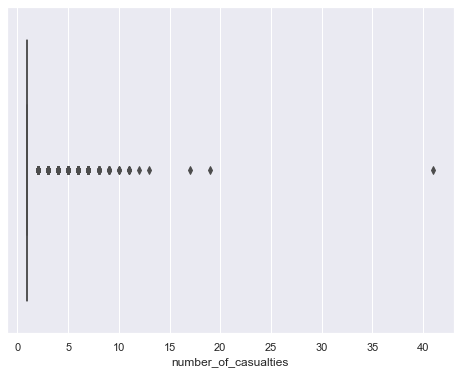

In [28]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)})

sns.boxplot(data = accidents, x = 'number_of_casualties')

<AxesSubplot:xlabel='number_of_casualties'>

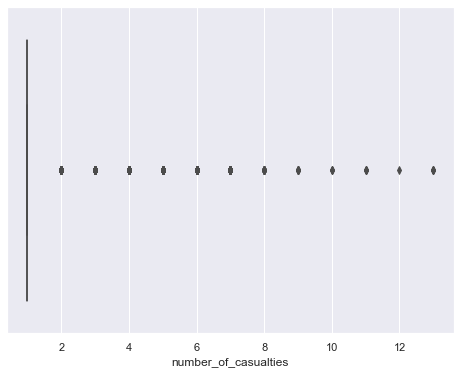

In [29]:
accidents['number_of_casualties'] = accidents['number_of_casualties'].apply(lambda x: 13 if x >= 15 else x)

sns.boxplot(data = accidents, x = 'number_of_casualties')

#### The number of fatalities range from 1 to 41. There were 12 accidents where more than 10 people were killed in a traffic accident in 2020. The maximum number of casualties in a traffic accident was 41. Based on the boxplots, I converted the cases with more than 15 casualties to 13 to address the extremely high numbers. 

## THE PERCENTAGE OF THE HIGH FATALITY ACCIDENTS

In [30]:
hf_accidents = accidents[accidents['number_of_casualties'] >=3]
hf_accidents.shape

(4422, 26)

In [31]:
hf_accidents.to_csv('hf_accidents.csv')

In [32]:
lf_accidents = accidents[accidents['number_of_casualties'] <3]
lf_accidents.shape

(73410, 26)

In [33]:
lf_accidents.to_csv('lf_accidents.csv')

In [34]:
# High Fatality vs. Low_Fatality accidents
accidents['hf_acc'].value_counts(normalize = True)

0.0    0.943185
1.0    0.056815
Name: hf_acc, dtype: float64

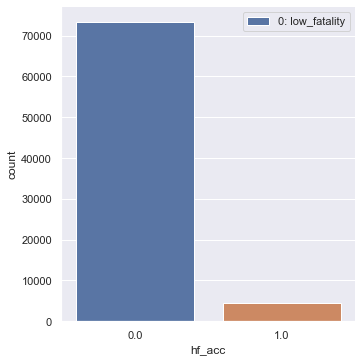

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

category =["0: low_fatality", "1: high_fatality"]

sns.catplot(x="hf_acc", data= accidents, kind="count")
plt.legend (category, loc= 'upper right')
plt.show()

#### High-fatality accidents where 3 or more people were killed makes up 5,68% of the total fatal accidents (in the UK, in 2020).  

In [ ]:
## PLease install the following modules for geographic visualization
"""
!pip install shapely
!pip install geopandas
!pip install missingno
!pip install contextily
"""

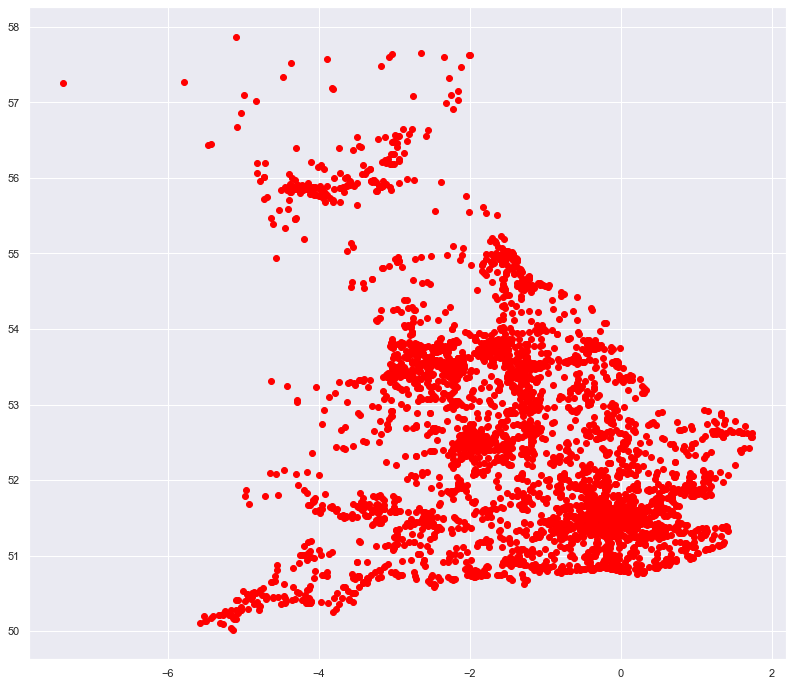

In [37]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as cx
%matplotlib inline


gdf = gpd.GeoDataFrame(hf_accidents, geometry=gpd.points_from_xy(hf_accidents.longitude, hf_accidents.latitude))


# plotting coordinates over a country level map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# then restrict this to the United Kingdom
ax = world[world.continent == 'United Kingdom'].plot(figsize=(15, 12), marker='o', markersize=15, alpha=0.5, linewidth=0.4)

# then plot the geodataframe on this
gdf.plot(ax=ax, color='red')
plt.show()

#### One of the popular policing strategies for crime prevention is hot-spots policing. Accordingly, police first identify the smaller geographic units with the highest crime rates and then adopt a targeted enforcement focusing on those smaller units. As can be seen above, spatial analysis of the high-fatality accidents in the UK indicates several hot-spots. One of them for example includes the major roads in and around London. Any attempt to reduce the high fatality accidents should take into account those hot-spots focusing primarily on them. 

# DESCRIPTIVE ANALYTICS
In this part, I will conduct descriptive analyses regarding the high fatality traffcic accidents.

In [38]:
accidents.to_csv('accidents_pro.csv')

## Speed and High Fatality Accidents

In [39]:
accidents = pd.read_csv('accidents_pro.csv')

accidents.groupby('hf_acc').speed_limit.mean()

hf_acc
0.0    36.892249
1.0    43.353686
Name: speed_limit, dtype: float64

In [40]:
hf_accidents['speed_limit'].corr(hf_accidents['number_of_casualties'])

0.04062765127250537

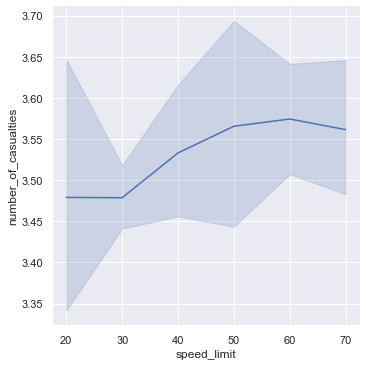

In [41]:
sns.relplot(x="speed_limit", y="number_of_casualties", data=hf_accidents, kind= 'line')

#### While the average speed in high-fatality accidents is 43.35 mph, it is 36.89 mph for the low-fatality accidents. As visualized above, as the speed increases so does the fatality. However bivariate analyis between the speed and fatality indicates a moderate correlation (0.38) implying that speed is not the only factor determining the fatality in the accidents.

## Urban vs. Rural Areas and High Fatality Accidents

In [42]:
hf_accidents.urban_or_rural_area.value_counts(normalize = True)

2.0    0.500905
1.0    0.499095
Name: urban_or_rural_area, dtype: float64

In [43]:
accidents.groupby('urban_or_rural_area')['number_of_casualties'].sum()

urban_or_rural_area
1.0    61875.0
2.0    38066.0
Name: number_of_casualties, dtype: float64

#### Being an urban or rural area does not seem to have a significant impact on the variation of the number of high-fatality accidents. The rate is almost fifty-fifty. However, the accidents occurring in the urban areas have a significantly higher death toll. The total number of casualties in the urban areas 38.48% more than the rural areas. While 38066 people got killed at the accidents in the rural areas during the whole year, this figure is 61875 in the urban areas.

## Light Conditions and Fatality Rates
67,41% of the high fatality accidents occurred in daylight. 21, 57 % of them took place after sunset where lights were lights were lit on the roads.

In [44]:
light_conditions = hf_accidents.light_conditions.value_counts(normalize = True)
light_conditions

1.0    0.674129
4.0    0.215739
6.0    0.103799
5.0    0.006332
Name: light_conditions, dtype: float64

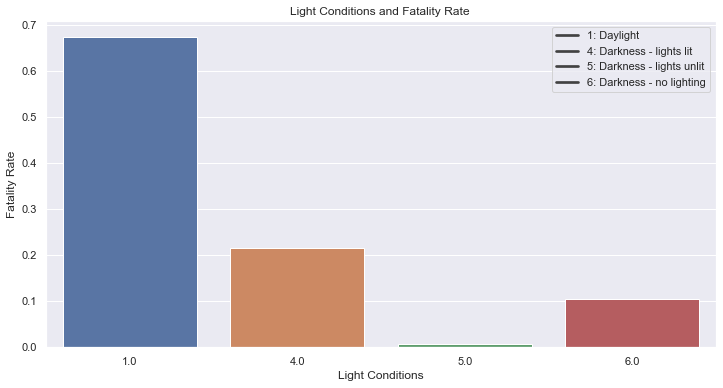

In [45]:
category = ["1: Daylight", "4: Darkness - lights lit", "5: Darkness - lights unlit", "6: Darkness - no lighting"]  

sns.set(rc={'figure.figsize':(12,6)})

# Bar plot
sns.barplot(y=light_conditions, x=light_conditions.index)

# Add labels to your graph
plt.xlabel('Light Conditions')
plt.ylabel('Fatality Rate')
plt.title("Light Conditions and Fatality Rate ")
plt.legend(category, loc= 'upper right')
plt.show()

## Weather Conditions and Fatality Rates
While 78,49% of the high fatality accidents took place under normal weather conditions, 14,04% of them occurred on the rainy days. 

In [46]:
weather_conditions = hf_accidents.weather_conditions.value_counts(normalize = True)
weather_conditions

1.0    0.784939
2.0    0.140434
5.0    0.024649
8.0    0.020805
4.0    0.018091
7.0    0.007689
3.0    0.002714
6.0    0.000678
Name: weather_conditions, dtype: float64

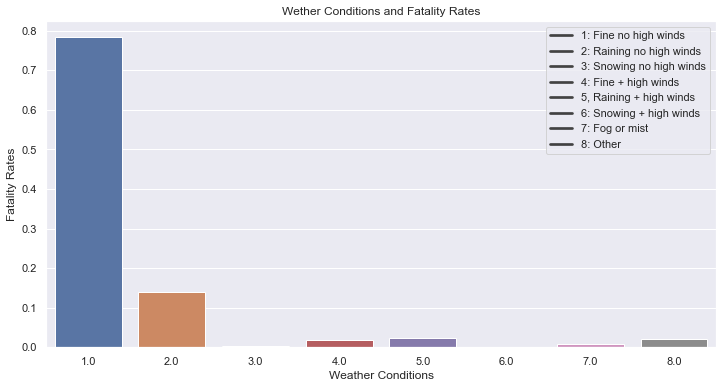

In [47]:
category = ["1: Fine no high winds", "2: Raining no high winds", "3: Snowing no high winds", "4: Fine + high winds", "5, Raining + high winds", "6: Snowing + high winds", "7: Fog or mist", "8: Other"]

# Creating a bar plot
sns.barplot(y=weather_conditions, x=weather_conditions.index)

# Add labels to your graph
plt.xlabel('Weather Conditions')
plt.ylabel('Fatality Rates')
plt.title("Wether Conditions and Fatality Rates")
plt.legend(category, loc= 'upper right')
plt.show()

## Day of the Week and High Fatality Accidents

The highest number of of high fatality accidents occurred on Saturdays. It is followed by Friday and Sunday. 

In [48]:
week_acc= hf_accidents['day_of_week'].value_counts(normalize= True)
week_acc

7.0    0.170511
6.0    0.162144
1.0    0.143826
5.0    0.133876
4.0    0.133198
3.0    0.129579
2.0    0.126866
Name: day_of_week, dtype: float64

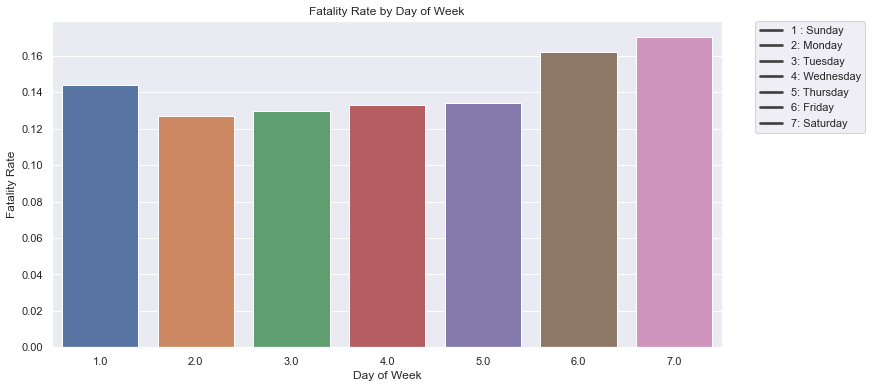

In [49]:
days= ['1 : Sunday','2: Monday','3: Tuesday','4: Wednesday','5: Thursday','6: Friday','7: Saturday']

sns.set(rc={'figure.figsize':(12,6)})

# Creating a bar plot
sns.barplot(y=week_acc, x=week_acc.index)

# Add labels to your graph
plt.xlabel('Day of Week')
plt.ylabel('Fatality Rate')
plt.title("Fatality Rate by Day of Week")
plt.legend(days,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()


# Use the following code if you want the legend out of the plot
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

## Road Class and High Fatality Accidents

#### Almost 50 % of the high fatality accidents take place on A roads, 26.27% of them occur on the unclassiffied roads while 13.13% occur on the B roads.

Note:
A-roads are classed as major roads that link regional towns and cities in the UK. They are also sometimes referred to as 'trunk' roads. A-roads can be either single or dual-carriageways and are found in both rural and urban areas. At present, there are more than 28,000 miles of A-roads in the UK.

B and C-roads are sometimes known as ‘minor’ roads in the UK. They are the roads that connect small towns and villages together. Surprisingly, there are more miles of B and C-roads in the UK than A-roads, as they make up over 87% of the total road length of the UK. 

Motorways are the high-speed roads that allow movement of vehicles between major towns and cities. At the moment, there are 2,173 miles of motorway in the UK spanning the length and breadth of the country for convenient cross-country travel.

https://www.bituchem.com/knowledge-hub/what-are-the-different-types-of-road-in-the-uk/#:~:text=A%2Droads%20are%20classed%20as,A%2Droads%20in%20the%20UK.

In [50]:
road_class = hf_accidents.first_road_class.value_counts(normalize = True)
road_class

3.0    0.495929
6.0    0.262777
4.0    0.131389
1.0    0.066486
5.0    0.040027
2.0    0.003392
Name: first_road_class, dtype: float64

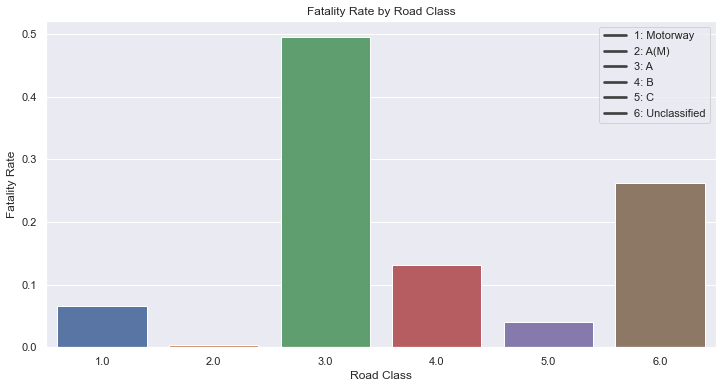

In [51]:
sns.set(rc={'figure.figsize':(12,6)})

categories=['1: Motorway', '2: A(M)', '3: A', '4: B', '5: C', '6: Unclassified']

# Creating a bar plot
sns.barplot(y=road_class, x=road_class.index)

# Add labels to your graph
plt.xlabel('Road Class')
plt.ylabel('Fatality Rate')
plt.title("Fatality Rate by Road Class")
plt.legend(categories, loc= 'upper right')
plt.show()

## Junctions and High Fatality Accidents

49.88% of the high fatality accidents involved not junction within 20 meters of the accident spot. In 25.93% of the high fatality accidents there was T or staggered junction within the 20 meters of the accident spot.In 12.98% of them there was a crossroad within the 20 meters of the accident spot.

In [52]:
junctions = hf_accidents.junction_detail.value_counts(normalize = True)
junctions

0.0    0.498869
3.0    0.259385
6.0    0.129806
1.0    0.051560
5.0    0.018770
8.0    0.015604
7.0    0.015378
2.0    0.010629
Name: junction_detail, dtype: float64

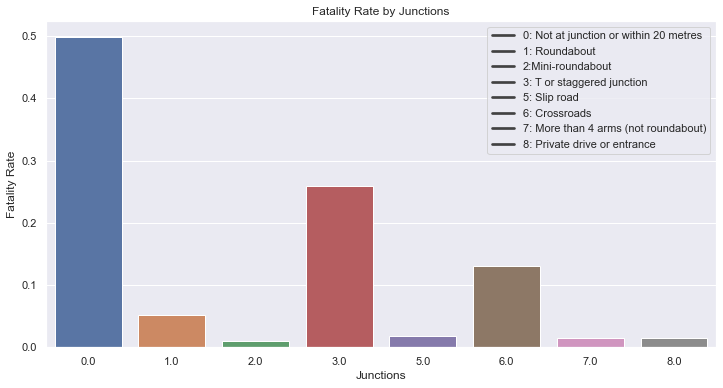

In [53]:
sns.set(rc={'figure.figsize':(12,6)})

category=['0: Not at junction or within 20 metres','1: Roundabout', '2:Mini-roundabout', '3: T or staggered junction', '5: Slip road', '6: Crossroads', '7: More than 4 arms (not roundabout)', '8: Private drive or entrance']

# Creating a bar plot
sns.barplot(y=junctions, x=junctions.index)

# Add labels to your graph
plt.xlabel('Junctions')
plt.ylabel('Fatality Rate')
plt.title("Fatality Rate by Junctions")
plt.legend(category, loc= 'upper right')
plt.show()

## Road Surface Conditions and High Fatality Accidents

65.15% of the high fatality accidents occurred when the road surface was dry. 33.58% of them occurred when the road was wet or damp.

In [54]:
road_surface_conditions = hf_accidents.road_surface_conditions.value_counts(normalize = True)
road_surface_conditions

1.0    0.651515
2.0    0.335821
4.0    0.007463
5.0    0.003392
3.0    0.001809
Name: road_surface_conditions, dtype: float64

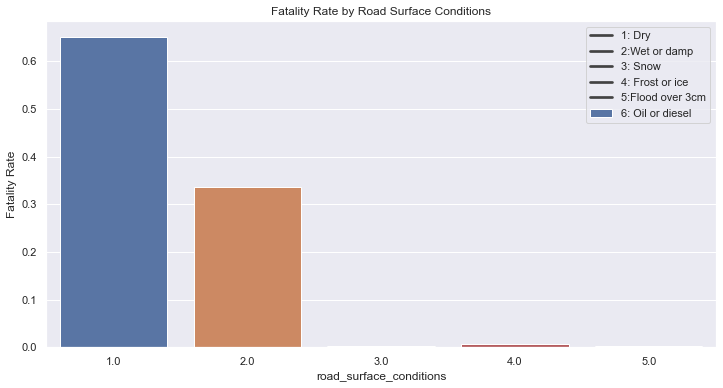

In [55]:
category=['1: Dry', '2:Wet or damp', '3: Snow', '4: Frost or ice', '5:Flood over 3cm', '6: Oil or diesel', '7:Mud']

# Create a bar plot
sns.barplot(y= road_surface_conditions, x= road_surface_conditions.index)

# Add labels to your graph
plt.xlabel('road_surface_conditions')
plt.ylabel('Fatality Rate')
plt.title("Fatality Rate by Road Surface Conditions")
plt.legend(category, loc= 'upper right')
plt.show()

## Carriageway Hazards and High Fatality Accidents

Overwhelming majority of the high fatality accidents (97.44%) took place when there was no additional carriageway hazards on the roads such as previous accident, vehicle load, dog or pedestrian on the road.

In [56]:
carriageway_hazards = hf_accidents.carriageway_hazards.value_counts(normalize = True)
carriageway_hazards

0.0    0.974446
2.0    0.012212
3.0    0.005654
1.0    0.003392
7.0    0.002488
6.0    0.001809
Name: carriageway_hazards, dtype: float64

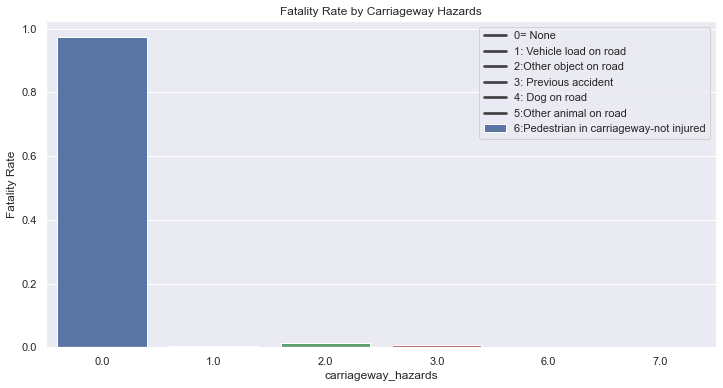

In [57]:
category=['0= None', '1: Vehicle load on road', '2:Other object on road', '3: Previous accident', '4: Dog on road', '5:Other animal on road', '6:Pedestrian in carriageway-not injured', '7:Any animal in carriageway (except ridden horse)']

# Creating a bar plot
sns.barplot(y=carriageway_hazards, x=carriageway_hazards.index)

# Add labels to your graph
plt.xlabel('carriageway_hazards')
plt.ylabel('Fatality Rate')
plt.title("Fatality Rate by Carriageway Hazards")
plt.legend(category, loc= 'upper right')
plt.show()

## THE TIME, DAY, MONTH AND FATALITY RATES

In order to visualize the relationship between the high-fatality accidents by the time, day and month, we can either use the number of the high-fatality accidents or the number of the casualties in the accidents. I used both to visualize the hourly results. The results indicated that the distribution remains almost the same, therefore I will use only the number of casualties as the fatality rates in the subsequent visualizations. Accordingly, the lowest fatality and accident rates occurred at 4:00 am while the highest fatality and accident rates occurred at the 16:00 pm. In total, 1469 people get killed in 404 accidents which occurred between 16:00 pm and 16:59 pm in 2020 in the UK.  
Both the accidents and fatality rates tend to be higher betweeen 12:00 pm and 19:00 pm in comparison to the other time slots. 

In [58]:
import pandas as pd
hf_accidents = pd.read_csv('hf_accidents.csv', index_col='date')

In [59]:
hf_accidents['date_time'] = hf_accidents.index.str.cat(hf_accidents.time, sep= ' ')

In [60]:
hf_accidents['date_time'] = pd.to_datetime(hf_accidents['date_time'])

In [61]:
hf_accidents.set_index('date_time', inplace=True)

In [62]:
hourly_hf_accidents = hf_accidents.groupby(hf_accidents.index.hour).hf_acc.sum()
hourly_hf_accidents

date_time
0      84.0
1      66.0
2      42.0
3      45.0
4      28.0
5      40.0
6      64.0
7     104.0
8     185.0
9     139.0
10    194.0
11    224.0
12    254.0
13    289.0
14    352.0
15    373.0
16    404.0
17    341.0
18    301.0
19    254.0
20    205.0
21    143.0
22    167.0
23    124.0
Name: hf_acc, dtype: float64

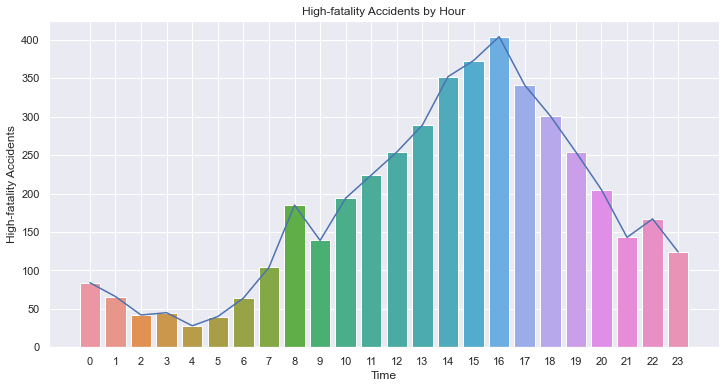

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
sns.barplot(y=hourly_hf_accidents, x=hourly_hf_accidents.index)

sns.set(rc={'figure.figsize':(12,8)})

# Add labels to your graph
plt.xlabel('Time')
plt.ylabel('High-fatality Accidents')
plt.title("High-fatality Accidents by Hour")


# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_fatality_rate' for only high fatality accidents
hourly_hf_accidents.plot()
# Add the xlabel, ylabel, and title
plt.xlabel('Time')
plt.ylabel('High-fatality Accidents')
plt.title('High-fatality Accidents by Hour')


plt.show()

## FATALITY RATES BY HOURS

In [64]:
# Calculate the hourly fatality rate
hourly_fatality_rate =hf_accidents.groupby(hf_accidents.index.hour).number_of_casualties.sum()
hourly_fatality_rate

date_time
0      290.0
1      231.0
2      141.0
3      154.0
4       94.0
5      137.0
6      225.0
7      357.0
8      655.0
9      479.0
10     658.0
11     780.0
12     907.0
13    1034.0
14    1220.0
15    1318.0
16    1469.0
17    1187.0
18    1047.0
19     897.0
20     729.0
21     518.0
22     597.0
23     450.0
Name: number_of_casualties, dtype: float64

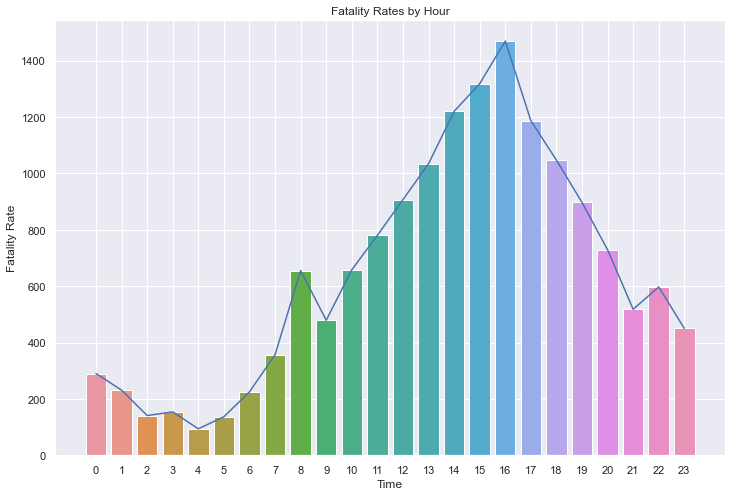

In [65]:
# Create a bar plot
sns.barplot(y=hourly_fatality_rate, x=hourly_fatality_rate.index)

sns.set(rc={'figure.figsize':(12,8)})

# Add labels to your graph
plt.xlabel('Time')
plt.ylabel('Fatality Rate')
plt.title("Fatality Rates by Hour")


# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_fatality_rate' for only high fatality accidents
hourly_fatality_rate.plot()
# Add the xlabel, ylabel, and title
plt.xlabel('Time')
plt.ylabel('Fatality Rate')
plt.title('Fatality Rates by Hour')

# Display the plot
plt.show()

## FATALITY RATES BY DAYS
The first three days of each month are likely to have a higher fatality rates than the other days. This might be related to the increasing seasonal commercial activities and transportation during the beginning of each month. The total number of the people who got killed in the second days of each month were 756.The fourth day had the lowest fatality rates with 105 casualties. 

In [66]:
# Calculate the daily casualty rate
daily_fatality_rate = hf_accidents.groupby(hf_accidents.index.day).number_of_casualties.sum()
daily_fatality_rate

date_time
1     624.0
2     756.0
3     640.0
4     105.0
5     243.0
6     396.0
7     522.0
8     731.0
9     565.0
10    488.0
11    395.0
12    616.0
13    471.0
14    614.0
15    506.0
16    428.0
17    497.0
18    578.0
19    479.0
20    567.0
21    499.0
22    528.0
23    557.0
24    553.0
25    537.0
26    518.0
27    459.0
28    455.0
29    494.0
30    423.0
31    330.0
Name: number_of_casualties, dtype: float64

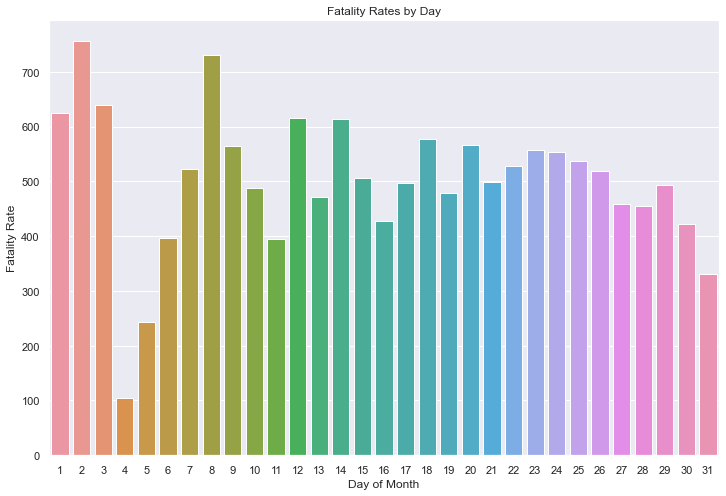

In [67]:
# Creating a bar plot
sns.barplot(y=daily_fatality_rate, x=daily_fatality_rate.index)

sns.set(rc={'figure.figsize':(12,8)})

# Add labels to your graph
plt.xlabel('Day of Month')
plt.ylabel('Fatality Rate')
plt.title("Fatality Rates by Day")

# Display the plot
plt.show()

## FATALITY RATES BY MONTHS
According to the descriptive analyses, January and August has the highest fatality rates with 1640 casualties. This might be attributed to the weather conditions during January and increasing vacation and travel activity during August. 

In [68]:
# Calculate the hourly casualty rate
monthly_fatality_rate = hf_accidents.groupby(hf_accidents.index.month).number_of_casualties.sum()
monthly_fatality_rate

date_time
1     1640.0
2     1566.0
3      877.0
4      718.0
5     1069.0
6     1367.0
7     1502.0
8     1640.0
9     1498.0
10    1323.0
11    1248.0
12    1126.0
Name: number_of_casualties, dtype: float64

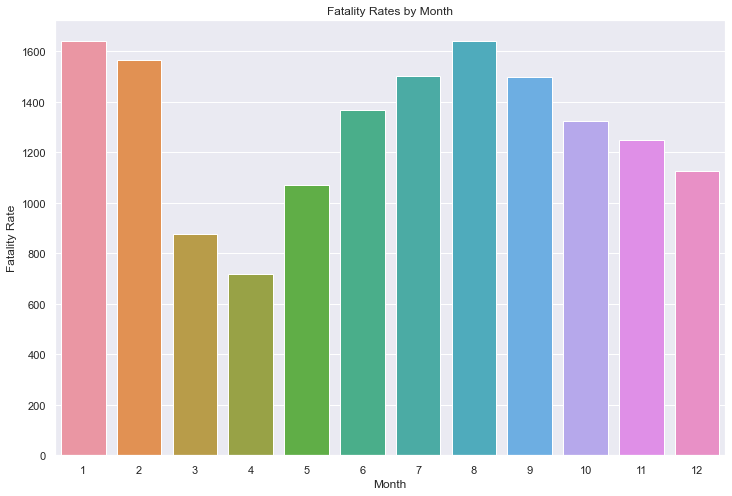

In [69]:
# Creating a bar plot
sns.barplot(y=monthly_fatality_rate, x=monthly_fatality_rate.index)

sns.set(rc={'figure.figsize':(12,8)})

# Add labels to your graph
plt.xlabel('Month')
plt.ylabel('Fatality Rate')
plt.title("Fatality Rates by Month")

# Display the plot
plt.show()

# PREDICTING THE HIGH FATALITY ACCIDENTS

In [70]:
accidents = pd.read_csv('accidents_pro.csv')

In [71]:
accidents.isnull().sum()

Unnamed: 0                                 0
accident_index                             0
accident_year                              0
accident_reference                         0
longitude                                  0
latitude                                   0
number_of_vehicles                         0
number_of_casualties                       0
date                                       0
day_of_week                                0
time                                       0
first_road_class                           0
first_road_number                          0
road_type                                  0
speed_limit                                0
junction_detail                            0
second_road_class                          0
second_road_number                         0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
light_conditions                           0
weather_conditions                         0
road_surfa

In [72]:
accidents.shape

(77832, 27)

In [73]:
accidents['hf_acc'] = accidents['hf_acc'].astype('str')

In [74]:
accidents['hf_acc'].value_counts()

0.0    73410
1.0     4422
Name: hf_acc, dtype: int64

In [75]:
accidents.to_csv('accidents2.csv')

#### LOAD THE DATA

In [76]:
import pandas as pd
accidents = pd.read_csv('data/accidents2.csv')
accidents.head()

,date,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,hf_acc
0,01/01/2020,2020010228005,2020,10228005,-0.178719,51.529614,3,1.0,1.0,4,01:25,5,0.0,6.0,30.0,3.0,6,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1,0
1,01/01/2020,2020010228006,2020,10228006,-0.001683,51.541210,2,1.0,1.0,4,01:50,3,11.0,6.0,30.0,0.0,6,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1,0
2,01/01/2020,2020010228011,2020,10228011,-0.137592,51.515704,3,1.0,2.0,4,02:25,3,40.0,6.0,30.0,3.0,5,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,0
3,01/01/2020,2020010228012,2020,10228012,-0.025880,51.476278,3,1.0,1.0,4,01:30,3,2209.0,2.0,20.0,3.0,6,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,0
4,01/01/2020,2020010228014,2020,10228014,0.011959,51.494780,3,2.0,1.0,4,03:43,6,0.0,6.0,30.0,3.0,6,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1,0


In [77]:
y = accidents.hf_acc

In [78]:
features = ['first_road_class','road_type', 'speed_limit', 'junction_detail', 'second_road_class', 'pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area']

X = accidents[features]

In [79]:
X.columns

Index(['first_road_class', 'road_type', 'speed_limit', 'junction_detail',
       'second_road_class', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area'],
      dtype='object')

In [80]:
X= X[['first_road_class', 'road_type','junction_detail',
       'second_road_class', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'speed_limit']].apply(lambda x: x.astype('str'))

In [81]:
X = pd.get_dummies(X, drop_first = True)

In [82]:
X.head()

,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,junction_detail_1.0,junction_detail_2.0,junction_detail_3.0,junction_detail_5.0,junction_detail_6.0,junction_detail_7.0,junction_detail_8.0,junction_detail_99.0,second_road_class_2,second_road_class_3,second_road_class_4,second_road_class_5,second_road_class_6,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,road_surface_conditions_2.0,road_surface_conditions_3.0,road_surface_conditions_4.0,road_surface_conditions_5.0,special_conditions_at_site_1.0,special_conditions_at_site_2.0,special_conditions_at_site_3.0,special_conditions_at_site_4.0,special_conditions_at_site_5.0,special_conditions_at_site_6.0,special_conditions_at_site_7.0,carriageway_hazards_1.0,carriageway_hazards_2.0,carriageway_hazards_3.0,carriageway_hazards_6.0,carriageway_hazards_7.0,urban_or_rural_area_2,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0
0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [15]:
# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [83]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier(class_weight='balanced', criterion='gini')

# Create the parameter grid
param_grid = {'n_estimators': [100, 150, 200], 'max_depth': [4, 8, 15], 'max_features': ['log2', 'sqrt'],  'min_samples_leaf': [2, 4, 6]}


# Create a GridSearchCV object
grid_rf_class=GridSearchCV(
    estimator=rf_class,
    param_grid= param_grid,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    refit=True, return_train_score=True)
print(grid_rf_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=4,
             param_grid={'max_depth': [4, 8, 15],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, scoring='roc_auc')


In [84]:
grid_rf_class. fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=4,
             param_grid={'max_depth': [4, 8, 15],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, scoring='roc_auc')

In [85]:
grid_rf_class_preds = grid_rf_class.best_estimator_.predict(X_test)
grid_rf_class_preds 

array([0, 0, 0, ..., 0, 1, 0])

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  	confusion_matrix(y_test, grid_rf_class_preds),  
  	accuracy_score(y_test, grid_rf_class_preds)))

Confusion Matrix: 

 [[10474  4518]
 [  422   469]] 
 Accuracy Score: 

 0.688975634326009


In [87]:
print(grid_rf_class.best_estimator_)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       max_features='log2', min_samples_leaf=2)


In [16]:
## RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=4, min_samples_split=2, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=4, random_state=None, verbose=0, warm_start=False, class_weight='balanced', ccp_alpha=0.0, max_samples=None)


rf_class.fit(X_train, y_train)

rf_class_preds = rf_class.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  	confusion_matrix(y_test, rf_class_preds),  
  	accuracy_score(y_test, rf_class_preds)))

Confusion Matrix: 

 [[10341  4651]
 [  423   468]] 
 Accuracy Score: 

 0.6805389410061071


In [21]:
## FEATURE IMPORTANCE
import pandas as pd
feature_imp = pd.Series(rf_class.feature_importances_ ,index= X_train.columns).sort_values(ascending=False).head(20)
feature_imp

speed_limit_30.0                               0.161912
urban_or_rural_area_2                          0.159900
speed_limit_60.0                               0.086431
first_road_class_6                             0.074433
speed_limit_70.0                               0.070506
junction_detail_1.0                            0.066219
light_conditions_6.0                           0.042419
road_type_3.0                                  0.041534
junction_detail_6.0                            0.028709
speed_limit_40.0                               0.024893
first_road_class_3                             0.024733
speed_limit_50.0                               0.020122
pedestrian_crossing_physical_facilities_1.0    0.019294
road_type_2.0                                  0.016061
junction_detail_3.0                            0.015174
junction_detail_99.0                           0.013882
second_road_class_3                            0.012770
road_surface_conditions_2.0                    0

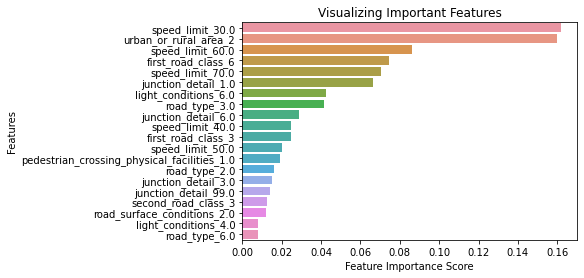

In [22]:
## VISUALIZE THE FEATURE IMPORTANCE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [150]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada = AdaBoostClassifier(n_estimators=150, learning_rate=1.5)

clf_ada.fit(X_train, y_train)

clf_ada_preds = clf_ada.predict(X_test)
clf_ada_preds

array([0, 0, 0, ..., 0, 0, 0])

In [151]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  	confusion_matrix(y_test, clf_ada_preds),  
  	accuracy_score(y_test, clf_ada_preds)))

Confusion Matrix: 

 [[14992     0]
 [  891     0]] 
 Accuracy Score: 

 0.9439022854624441


In [153]:
## FEATURE IMPORTANCE
import pandas as pd
feature_imp = pd.Series(clf_ada.feature_importances_ ,index= X_train.columns).sort_values(ascending=False).head(20)
feature_imp

first_road_class_6                       0.053333
speed_limit_30.0                         0.053333
first_road_class_3                       0.046667
speed_limit_60.0                         0.046667
speed_limit_70.0                         0.040000
road_type_6.0                            0.040000
junction_detail_6.0                      0.033333
urban_or_rural_area_2                    0.033333
speed_limit_40.0                         0.033333
junction_detail_1.0                      0.026667
carriageway_hazards_7.0                  0.026667
junction_detail_5.0                      0.026667
speed_limit_50.0                         0.026667
first_road_class_4                       0.026667
pedestrian_crossing_human_control_1.0    0.020000
carriageway_hazards_3.0                  0.020000
carriageway_hazards_1.0                  0.020000
road_surface_conditions_4.0              0.020000
road_surface_conditions_2.0              0.020000
light_conditions_4.0                     0.020000


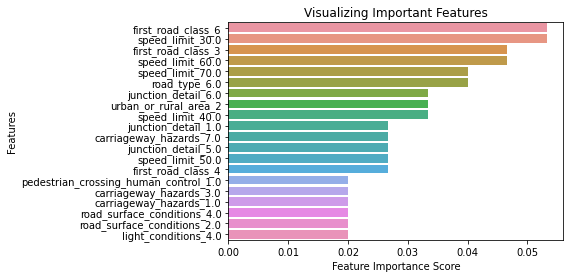

In [154]:
## VISUALIZE THE FEATURE IMPORTANCE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### STRUCTURAL DETERMINANTS OF HIGH FATALITY ACCIDENTS
Random Forest and Adaboost analyses were conducted to analyze the structural determinants of high-fatality traffic accidents in the UK. While random forest has a moderate accuracy rate, Adaboost has 94% accuracy. The analyses indicated that the speed limit, road class, road type and the location of the accidents being urban or rural area are the most important factors explaining the variation in the high-fatality accidents.

In [ ]:
# Install mlextend to implement stacking
"""
!pip install mlxtend
"""

## Ensemble Model

In [39]:
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Instantiate the first-layer classifiers
clf_dt = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=9, random_state=500)
clf_knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
clf_rf = RandomForestClassifier(class_weight='balanced', max_depth=15, max_features='sqrt', min_samples_leaf=6)

# Instantiate the second-layer meta classifier
clf_meta = DecisionTreeClassifier(random_state=500)

# Build the Stacking classifier
clf_stack = StackingClassifier(classifiers=[clf_dt, clf_knn, clf_rf], meta_classifier=clf_meta, use_features_in_secondary=True)
clf_stack.fit(X_train, y_train)

StackingClassifier(classifiers=[DecisionTreeClassifier(min_samples_leaf=3,
                                                       min_samples_split=9,
                                                       random_state=500),
                                KNeighborsClassifier(algorithm='ball_tree'),
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=15,
                                                       max_features='sqrt',
                                                       min_samples_leaf=6)],
                   meta_classifier=DecisionTreeClassifier(random_state=500),
                   use_features_in_secondary=True)

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Evaluate the performance of the Stacking classifier
pred_stack = clf_stack.predict(X_test)
pred_stack

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Get confusion matrix & accuracy for the model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  	confusion_matrix(y_test, pred_stack),  
  	accuracy_score(y_test, pred_stack)))

Confusion Matrix: 

 [[14862   130]
 [  879    12]] 
 Accuracy Score: 

 0.9364729585090977


# RESULTS
91119 fatal traffic accidents took place in the UK in 2020.
The number of fatalities range from 1 to 41. There were 12 accidents where more than 10 people were killed in a traffic accident in 2020. The maximum number of casualties in a traffic accident was 41. High-fatality accidents where 3 or more people were killed makes up 5,68 % of the total fatal accidents.

While the average speed in high-fatality accidents is 43.35 mph, it is 36.89 mph for the low-fatality accidents. As the speed increases so does the fatality rates. However bivariate analysis between the speed and fatality rates indicates a weak correlation (0.38) implying that speed is not the only factor determining the fatality rates in the accidents.

Being an urban or rural area does not seem to have a significant impact on the variation of the number of high-fatality accidents. The rate is almost fifty-fifty. However, the accidents occurring in the urban areas have a significantly higher death toll. The total number of casualties in the urban areas 38.48% more than the rural areas.

While 78,49% of the high fatality accidents took place under normal weather conditions, 14,04% of them occurred on the rainy days.
67,41% of the high fatality accidents occurred in daylight. 21, 57 % of them took place after sunset where lights were lit on the roads.

The highest number of high fatality accidents occurred on Saturdays. It is followed by Friday and Sunday.

Almost 50 % of the high fatality accidents take place on A roads, 26.27% of them occur on the unclassified roads while 13.13% occurred on the B roads.

49.88% of the high fatality accidents involved not junction within 20 meters of the accident spot. In 25.93% of the high fatality accidents there was T or staggered junction within the 20 meters of the accident spot.

65.15% of the high fatality accidents occurred when the road surface was dry. 33.58% of them occurred when the road was wet or damp.
Overwhelming majority of the high fatality accidents (97.44%) took place when there were no additional carriageway hazards on the roads such as previous accident, vehicle load, dog, or pedestrian on the road.

The lowest fatality and accident rates occurred at 4:00 am while the highest fatality and accident rates occurred at the 16:00 pm. 
In total, 1469 people were killed in 404 accidents which occurred between 16:00 pm and 16:59 pm in 2020 in the UK. Both the accidents and fatality rates tend to be higher between 12:00 pm and 19:00 pm in comparison to the other time slots.

The first three days of each month are likely to have a higher fatality rates than the other days. This might be related to the increasing seasonal commercial activities and transportation during the beginning of each month. The total number of the people who got killed in the second days of each month were 756.The fourth day had the lowest fatality rates with 105 casualties.

According to the descriptive analyses, January and August has the highest fatality rates with 1640 casualties. This might be attributed to the weather conditions during January and increasing vacation and travel activity during August.

Random Forest and Adaboost analyses were conducted to analyze the structural determinants of high-fatality traffic accidents in the UK. While random forest has a moderate accuracy rate, Adaboost has 94% accuracy. The analyses indicated that the speed limit, road class, road type and the location of the accidents being urban or rural area are the most important factors explaining the variation in the high-fatality accidents.
An ensemble model achieved 93.64 accuracy in predicting the high-fatality accidents in the U in 2020.

# CONCLUSION

One of the popular policing strategies for crime prevention is hot-spots policing. Accordingly, police should identify the smaller geographic units with the highest crime rates first and then adopt a targeted enforcement focusing on those smaller units. Spatial analysis of the high-fatality accidents in the UK indicates several hot-spots. One of them for example includes the major roads in and around London. Any attempt to reduce the high fatality accidents should consider those hot spots focusing primarily on them on certain days and at specific times. To reduce the high-fatality traffic accidents in the UK more effectively, police should adopt targeted enforcement on A-roads in and around London and several other hot spots, from Friday to Sunday, between 13:00 pm-17:00 pm, focusing on speed limit violations and other factors such as junctions.